<a href="https://colab.research.google.com/github/iamvishnusingh/Python/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path="/content/sample_data/Churn_Modelling.csv"
dataset=pd.read_csv(path)
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
dataset.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...              

In [7]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

X=pd.concat([X,geography,gender],axis=1)

X=X.drop(['Geography','Gender'],axis=1)

In [8]:
X.head(30)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [9]:
#splitting the dataset into training set and  train set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y , test_size=0.2,random_state=0)


In [10]:
from sklearn.preprocessing import StandardScaler
Standard_Scalar=StandardScaler()
X_train=Standard_Scalar.fit_transform(X_train)
X_test=Standard_Scalar.fit_transform(X_test)

In [11]:
#Part 2 Now lets make an ANN
import keras

Using TensorFlow backend.


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout



In [13]:
classifier=Sequential()

In [19]:
#adding the input layer and first hidden layer
classifier.add(Dense(units=6,kernel_initializer ='he_uniform',activation='relu' ,input_dim=11))

In [20]:
#adding the second Hidden Layer
classifier.add(Dense(units=6,kernel_initializer ='he_uniform',activation='relu'))

In [22]:
#adding output layer
classifier.add(Dense(units=1,kernel_initializer ='glorot_uniform',activation='sigmoid' ))

In [23]:
#compiling the ANN
classifier.compile(optimizer='Adam' , loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#fitting the ANN to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 358us/step - loss: 0.5349 - accuracy: 0.7494 - val_loss: 0.4585 - val_accuracy: 0.7982
Epoch 2/100
5359/5359 [==============================] - 1s 244us/step - loss: 0.4354 - accuracy: 0.8057 - val_loss: 0.4269 - val_accuracy: 0.8084
Epoch 3/100
5359/5359 [==============================] - 1s 235us/step - loss: 0.4072 - accuracy: 0.8147 - val_loss: 0.4131 - val_accuracy: 0.8107
Epoch 4/100
5359/5359 [==============================] - 1s 242us/step - loss: 0.3923 - accuracy: 0.8173 - val_loss: 0.4042 - val_accuracy: 0.8141
Epoch 5/100
5359/5359 [==============================] - 1s 255us/step - loss: 0.3827 - accuracy: 0.8199 - val_loss: 0.3974 - val_accuracy: 0.8148
Epoch 6/100
5359/5359 [==============================] - 1s 228us/step - loss: 0.3763 - accuracy: 0.8250 - val_loss: 0.3938 - val_accuracy: 0.8171
Epoch 7/100
5359/5359 [==============================] - 1s 175us/step

In [25]:
#list all data in history
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


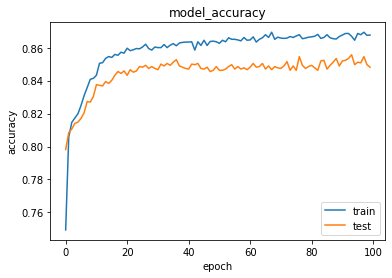

In [33]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

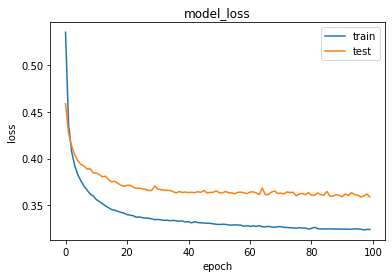

In [35]:
#Summerizing History for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [36]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1539   56]
 [ 220  185]]


In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.862
